# Precipitation seasonality

First let's import necessary modules: <br>

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Open and read a netCDF file.

In [4]:
# Open a netCDF file
#filename='/Users/jungeunl/Cycad/class/data/trmm_mon_1998_2015.nc'  # Note that the time coordinate is not correct
filename='trmm_mon_1998_2015.nc'
with xr.open_dataset(filename) as ds: 
    print(ds)  

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 1440, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2006-07-02T12:00:00 ... 2007-06-01T17:20:00
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1


Print variables in the file.

In [5]:
prcp = ds.pcp*24.  # Save pcp values as prcp and covert the unit from mm/hr to mm/day

Let's check the dimension of prcp.

In [6]:
print(prcp.shape)

(12, 400, 1440)


The dimensions are time, latitude and longitude.

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for annual average precipitation.

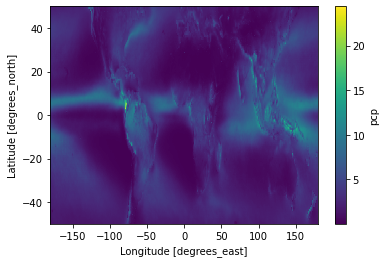

In [7]:
prcp_ann=prcp.mean(dim='time')
prcp_ann.plot()

Let's try to make the plot prettier.
First, let's use a different color map. The list of available color maps is here:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

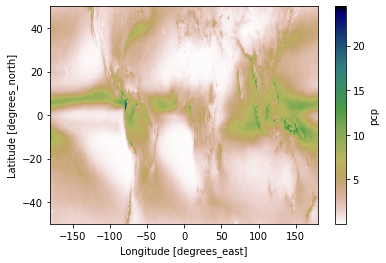

In [8]:
# color map
cmap1=plt.cm.gist_earth_r      # _r makes the reverse version of the color map.
prcp_ann.plot(cmap=cmap1)

Let's modify contour levels. 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

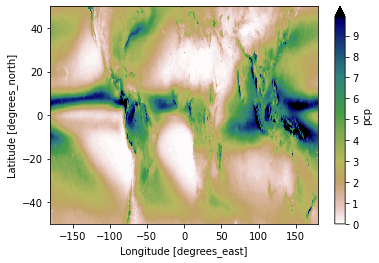

In [9]:
lev1=np.arange(0,10,0.1)
prcp_ann.plot(cmap=cmap1,levels=lev1)

Let's add a map.
https://scitools.org.uk/cartopy/docs/v0.15/gallery.html

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


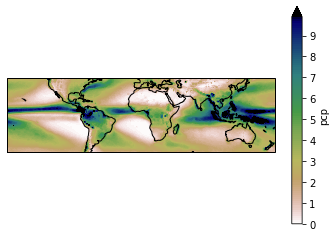

In [10]:
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
prcp_ann.plot.contourf(ax=ax,transform=proj, cmap=cmap1,levels=lev1)
ax.coastlines()

Make the plot a little larger. https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html

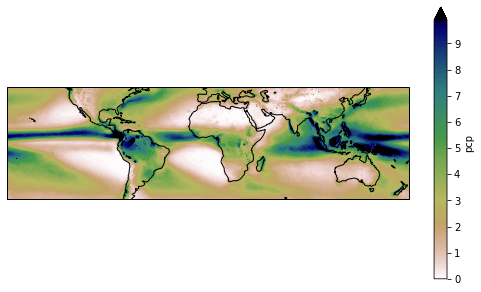

In [11]:
fig = plt.figure(figsize=(9,5))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
prcp_ann.plot.contourf(ax=ax,transform=proj, cmap=cmap1,levels=lev1)
ax.coastlines()

Modify color bar location.
https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/04_plotting_and_visualization.html

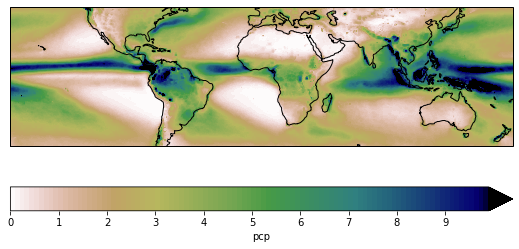

In [12]:
fig = plt.figure(figsize=(9,5))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
prcp_ann.plot.contourf(ax=ax,transform=proj, cmap=cmap1,levels=lev1, 
                       cbar_kwargs={"orientation": "horizontal"})
ax.coastlines()

### Precipitation seasonality

#### Exercise
Make a contour plot of January precipitation.

#### Exercise
Make a contour plot of July precipitation

#### Exercise
Make a contour plot of July - January precipitation

## Seasonal variation of precipitation
Let's calculate the zonal average of precipitation

In [13]:
prcp_lat=prcp.mean(dim='longitude')

Check the shape of the variable prcp_lat.

In [14]:
print(prcp_lat.shape)

(12, 400)


Let's make a plot.

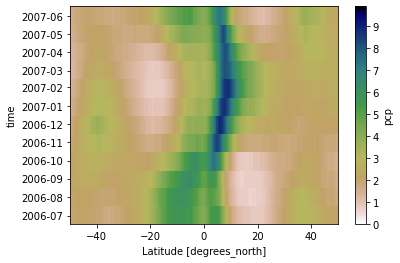

In [15]:
prcp_lat.plot(levels=lev1,cmap=cmap1) 
# Ignore time axis

Let's plot only for the African average between -5 to 40.

In [16]:
# Check longitude axis
print(ds.longitude)

<xarray.DataArray 'longitude' (longitude: 1440)>
array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875])
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    units:      degrees_east
    long_name:  Longitude


In [17]:
# Choose and average
prcp_africa=prcp.sel(longitude=slice(-5,40)).mean(dim='longitude')

In [18]:
#check prcp_a
print(prcp_africa.shape)

(12, 400)


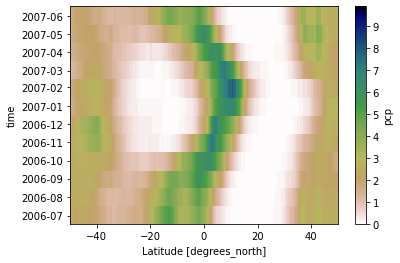

In [19]:
prcp_africa.plot(levels=lev1,cmap=cmap1)

### Exercise
## Precipitation seasonality in Asia
Calculate and plot the zonal average of precipitation between 60E to 120E. Let's first calculate average precipitation in Asia.

Make a contour plot.